In [71]:
import re
import pymongo
import pprint
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from config import *

In [2]:
client = pymongo.MongoClient(MONGO_CLIENT)
db = client.twitterdb

In [69]:
def clean_tweet(text):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", text).split())

In [74]:
tweets = db.twitter_search
tweets_list = []
# print('Total Record for the collection: ' + str(tweets.estimated_document_count()))
for tweet in tweets.find():
    # pprint.pprint(tweet)
    text = tweet.get("text", None)
    geography = tweet.get("geo", None)
    reply_count = tweet.get("reply_count", 0)
    retweet_count = tweet.get("retweet_count", 0)
    favorite_count = tweet.get("favorite_count", 0)
    timestamp = tweet.get("created_at", None)
    timestamp = pd.to_datetime(timestamp)
    source = tweet.get("source", None)
    
    tweets_list.append([text, hashtags, geography, reply_count, retweet_count, favorite_count, timestamp, source])

In [76]:
df = pd.DataFrame(tweets_list)
df.columns = ["text", "hashtags", "geography", "reply_count", "retweet_count", "favorite_count", "timestamp", "source"]
df["text"] = df["text"].map(str).apply(clean_tweet)
df.head()

,text,hashtags,geography,reply_count,retweet_count,favorite_count,timestamp,source
0,RT I am in the South of France all the news ch...,[],None,0,0,0,2020-06-14 18:40:23+00:00,"<a href=""http://twitter.com/download/iphone"" r..."
1,RT Exclusivo Trump est estudiando sancionar a ...,[],None,0,0,0,2020-06-14 18:40:23+00:00,"<a href=""http://twitter.com/download/android"" ..."
2,RT From ordering in the military to bludgeonin...,[],None,0,0,0,2020-06-14 18:40:23+00:00,"<a href=""https://mobile.twitter.com"" rel=""nofo..."
3,RT The videos again raised questions about the...,[],None,0,0,0,2020-06-14 18:40:23+00:00,"<a href=""https://mobile.twitter.com"" rel=""nofo..."
4,RT JUST IN Secret Service walks back statement...,[],None,0,0,0,2020-06-14 18:40:24+00:00,"<a href=""http://twitter.com/download/iphone"" r..."


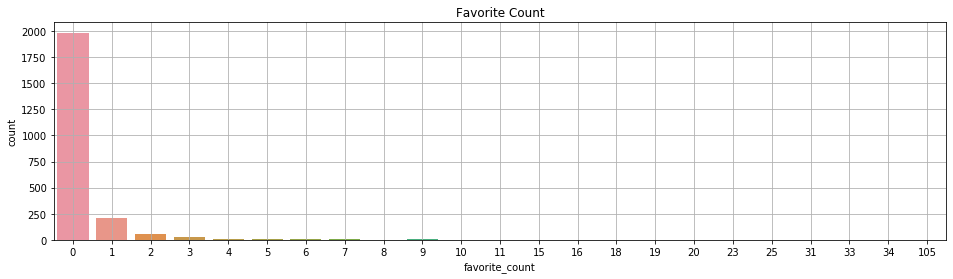

In [68]:
plt.figure(figsize=(16, 4))
sns.countplot("favorite_count", data=df)
plt.title("Favorite Count")
plt.grid()
plt.show()